# LDA - Sentimento em relação ao aquecimento global



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data//twitter/twitter_sentiment_data_cleaned.csv`

In [1]:
# Resposta:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lda_over_time.lda_over_time import LdaOverTime
from lda_over_time.models.lda_seq_model import LdaSeqModel

from lda_over_time.models.temporal_lda_model import TemporalLdaModel

import lda_over_time

C:\Users\thiag\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
tweets_path = "../data/twitter/twitter_sentiment_data_cleaned.csv"

data = pd.read_csv(
    tweets_path, 
    usecols=["DATE", "MESSAGE", "SENTIMENT"], 
    encoding="latin-1"
)

df_pro = data.loc[data['SENTIMENT'] == 1]
df_neutral = data.loc[data['SENTIMENT'] == 0]
df_anti = data.loc[data['SENTIMENT'] == -1]

Utiliza o *spacy* para filtrar e limpar os textos

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
filters = {
    "ADJ": "adjective",
    "ADV": "adverb",
    "NOUN": "noun",
    "PROPN": "proper noun",
    "VERB": "verb",
}

In [5]:
import re

def prepare_model(df):
    tweets = df['MESSAGE']
    clean_tweets = []

    for tweet in tweets:
        clean = []
        
        cleaned_tweet = re.sub('[^\x00-\x7F]+', '', tweet, flags=re.IGNORECASE)
        cleaned_tweet = re.sub('#|RT|\$|\||https:\/\/t\.co\/\w+', '', cleaned_tweet, flags=re.IGNORECASE)
        cleaned_tweet = re.sub('climate change|global warming', '', cleaned_tweet, flags=re.IGNORECASE)

        for word in nlp(cleaned_tweet):
            if word.pos_ in filters:
                clean.append(word.lemma_)
                
        # append cleanned text
        clean_tweets.append(' '.join(clean))

    model = TemporalLdaModel(
            corpus = clean_tweets,         # list texts to be analysed
            dates = df["DATE"].values,     # dates of each article
            date_format = "%Y/%m/%d",        # date format is MM/DD/YYYY
            freq = "1M",                     # frequency of one semester
            n_topics = 5,                    # we want to get 5 topics
        )
    return model

In [6]:
#cleaned_pro = prepare_model(df_pro)
#cleaned_neutral = prepare_model(df_neutral)
#cleaned_anti = prepare_model(df_anti)
cleaned_df = prepare_model(data)

In [7]:
%%time
main = LdaOverTime(cleaned_df)

CPU times: total: 22.9 s
Wall time: 55.7 s


In [8]:
%%time
for topic_id in range(1, 6):
    print(
        main.get_topic_words(
            topic_id=topic_id,  # select which topic we want
            timeslice=1,        # get the oldest time slice found in our trainning
            n=20               # we want the top 10 words for each topic
        )
    )

['world', 'right', 'here', 'end', 'think', 'watch', 'trump', 'first', 'Trump', 'tackle', 'hoax', 'Clinton', 'Obama', 'htt', 'website', 'term', 'future', 'leader', 'hit', 'Hillary']
['Trump', 'say', 'have', 'believe', 'Paris', '-', 'make', 'amp', 'Donald', 'China', 'President', 'fight', 'people', 'president', 'hoax', 'call', 'trump', 'world', 'plan', 'q']
['think', 'go', 'believe', 'real', 'EPA', 'just', 'die', 'get', 'so', 'do', 'Pruitt', 'take', 'say', 'Scott', 'here', 'make', 'year', 'people', 'thing', 'claim']
['amp', 'fight', 'more', 'say', 'have', 'scientist', 'new', 'look', 'so', 'weather', 'New', 'cause', 'do', 'now', 'help', 'make', 'need', 'know', 'study', 'denier']
['cause', 'say', 'amp', 'more', 'have', 'human', 'make', 'global', 'year', 'scientist', 'impact', 'big', 'fight', 'issue', 'health', 'just', 'ice', 'real', 'energy', 'face']
CPU times: total: 0 ns
Wall time: 4 ms


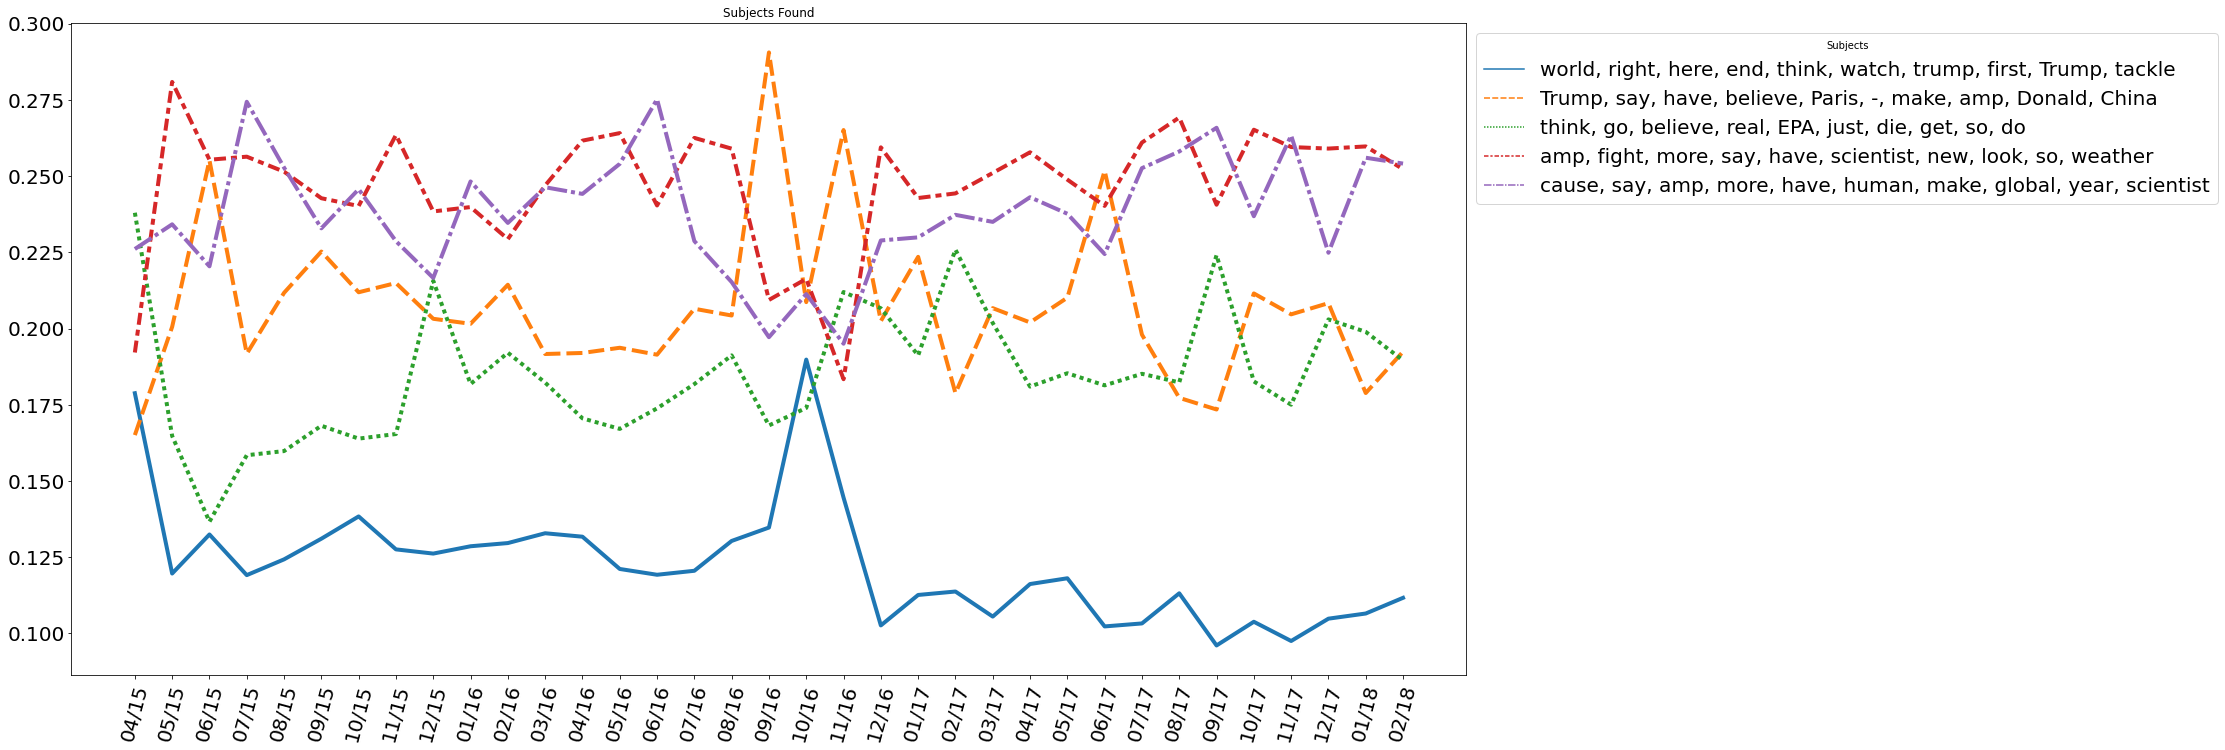

In [9]:
plt.figure(figsize=(25, 12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
main.plot(
    title = 'Subjects Found',    # Plot's title
    
    legend_title="Subjects",     # Legend's title
    
    # path_to_save="./plot_of_news.png",   # Set location to save
    
    display=True,                # Display graph (default)
    
    rotation=75,                 # Rotate labels in 75º
    
    mode="line",                 # Plot lines (default)
    
    date_format="%m/%y",         # Set custom date format to MM/YYYY,
    linewidth=4
)
